
#Context:

An over-the-top (OTT) media service is a media service offered directly to viewers via the internet. The term is most synonymous with subscription-based video-on-demand services that offer access to film and television content, including existing series acquired from other producers, as well as original content produced specifically for the service. They are typically accessed via websites on personal computers, apps on smartphones and tablets, or televisions with integrated Smart TV platforms

#Objective:

ShowTime is an OTT service provider and offers a wide variety of content (movies, web shows, etc.) for its users. They want to determine the driver variables for first-day content viewership so that they can take necessary measures to improve the viewership of the content on their platform. Some of the reasons for the decline in viewership of content would be the decline in the number of people coming to the platform, decreased marketing spend, content timing clashes, weekends and holidays, etc. They have hired you as a Data Scientist, shared the data of the current content on their platform, and asked you to analyze the data and come up with a linear regression model to determine the driving factors for first-day viewership.

Importing necessary libraries and data

#Data Description


Data Dictionary:

visitors: Average number of visitors, in millions, to the platform in the past week

ad_impressions: Number of ad impressions, in millions, across all ad campaigns

for the content (running and completed)

major_sports_event: Any major sports event on the day

genre: Genre of the content

dayofweek: Day of the release of the content

season: Season of the release of the content

views_trailer: Number of views, in millions, of the content trailer

views_content: Number of first-day views, in millions, of the content

In [ ]:

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import statsmodels.api as sm

from statsmodels.stats.outliers_influence import variance_inflation_factor


import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Loading the data

In [ ]:
df= pd.read_csv('/content/drive/MyDrive/ShowTime/ottdata.csv')

# Copy data

In [ ]:
data =df.copy()

#Data Over View

In [ ]:
data.head()

,visitors,ad_impressions,major_sports_event,genre,dayofweek,season,views_trailer,views_content
0,1.67,1113.81,0,Horror,Wednesday,Spring,56.70,0.51
1,1.46,1498.41,1,Thriller,Friday,Fall,52.69,0.32
2,1.47,1079.19,1,Thriller,Wednesday,Fall,48.74,0.39
3,1.85,1342.77,1,Sci-Fi,Friday,Fall,49.81,0.44
4,1.46,1498.41,0,Sci-Fi,Sunday,Winter,55.83,0.46


In [ ]:
data.tail()

,visitors,ad_impressions,major_sports_event,genre,dayofweek,season,views_trailer,views_content
995,1.58,1311.96,0,Romance,Friday,Fall,48.58,0.36
996,1.34,1329.48,0,Action,Friday,Summer,72.42,0.56
997,1.62,1359.80,1,Sci-Fi,Wednesday,Fall,150.44,0.66
998,2.06,1698.35,0,Romance,Monday,Summer,48.72,0.47
999,1.36,1140.23,0,Comedy,Saturday,Summer,52.94,0.49


The data set contain the information about the view of OTT

There are some different types of Genre, session and multiple types of Categorical Variablers


#Checking the shape of the dataset

In [ ]:
data.shape

(1000, 8)

There are 1000 rows and 8 columns in the dataset.

# Checking the data types of the columns for the dataset

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   visitors            1000 non-null   float64
 1   ad_impressions      1000 non-null   float64
 2   major_sports_event  1000 non-null   int64  
 3   genre               1000 non-null   object 
 4   dayofweek           1000 non-null   object 
 5   season              1000 non-null   object 
 6   views_trailer       1000 non-null   float64
 7   views_content       1000 non-null   float64
dtypes: float64(4), int64(1), object(3)
memory usage: 62.6+ KB


In given data set there are amultiple typs of  variable  like Object  , integer and float

Genre , Season , dayofweek is object type
major sports event is integer type
and rest of the variable is float type

#Checking for unique values

In [ ]:
data.nunique()

,0
visitors,56
ad_impressions,80
major_sports_event,2
genre,8
dayofweek,7
season,4
views_trailer,799
views_content,61


#Checking for duplicate values

In [ ]:
data.duplicated().sum()

np.int64(0)

There is no any Duplicate value in data Set

# Checking for missing values

In [ ]:
data.isnull().sum()

,0
visitors,0
ad_impressions,0
major_sports_event,0
genre,0
dayofweek,0
season,0
views_trailer,0
views_content,0


There is no any Missing valu in the given data set

# Exploratory Data Analysis

Let's check the statistical summary of the numerical variables.

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
visitors,1000.0,1.70429,0.231973,1.25,1.5500,1.70,1.830,2.34
ad_impressions,1000.0,1434.71229,289.534834,1010.87,1210.3300,1383.58,1623.670,2424.20
major_sports_event,1000.0,0.40000,0.490143,0.00,0.0000,0.00,1.000,1.00
views_trailer,1000.0,66.91559,35.001080,30.08,50.9475,53.96,57.755,199.92
views_content,1000.0,0.47340,0.105914,0.22,0.4000,0.45,0.520,0.89


In the given data set add inpression mean is highest and max of add impression is 2424
view Content mean is 0.47340 and max is 0.89 %

# **Univariate Analysis**

Distribution of Numerical variables

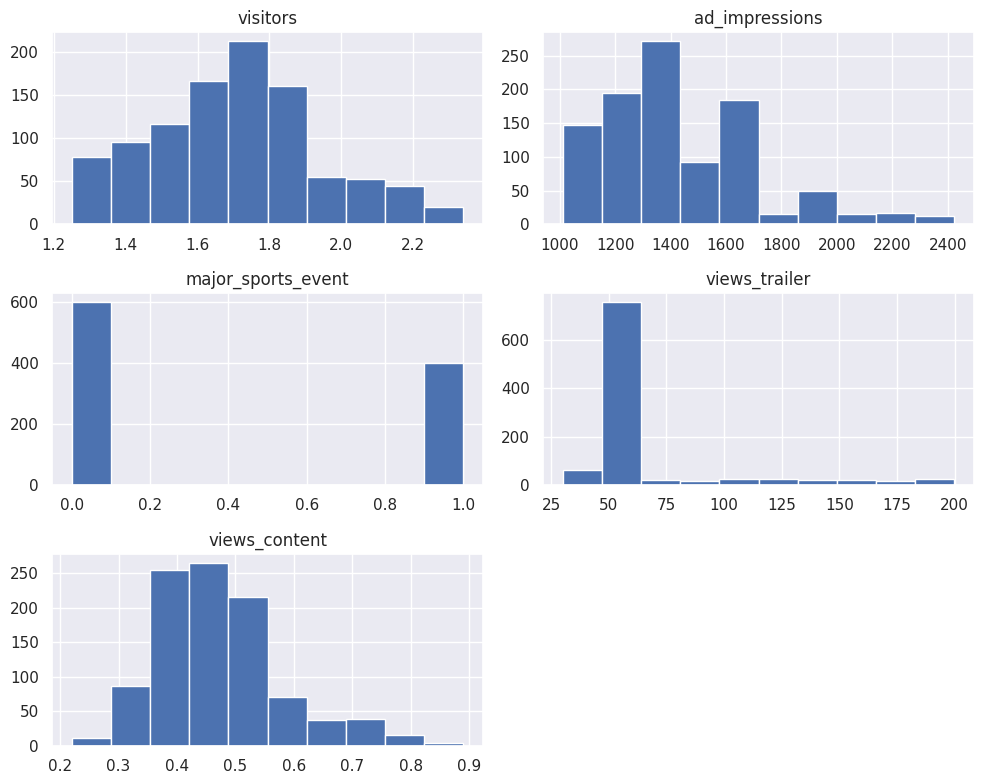

In [ ]:
data.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

Distribution of Categorical Variable

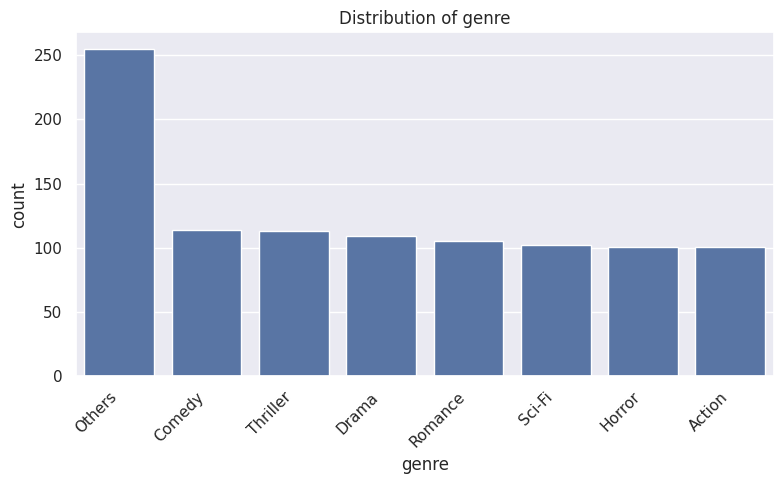

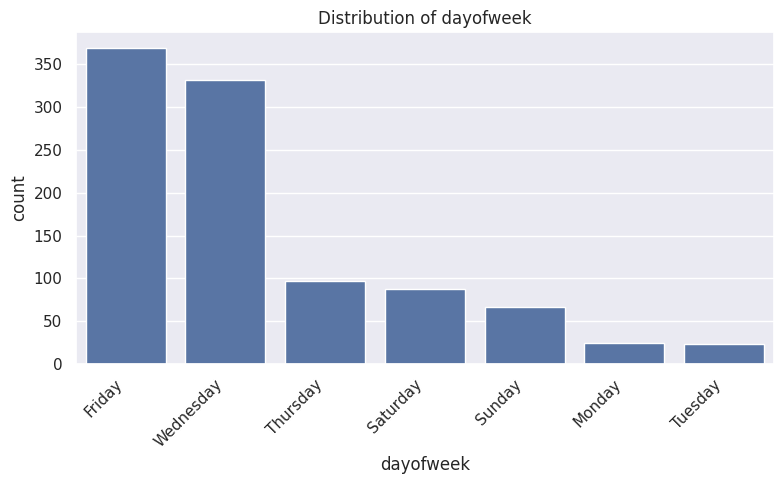

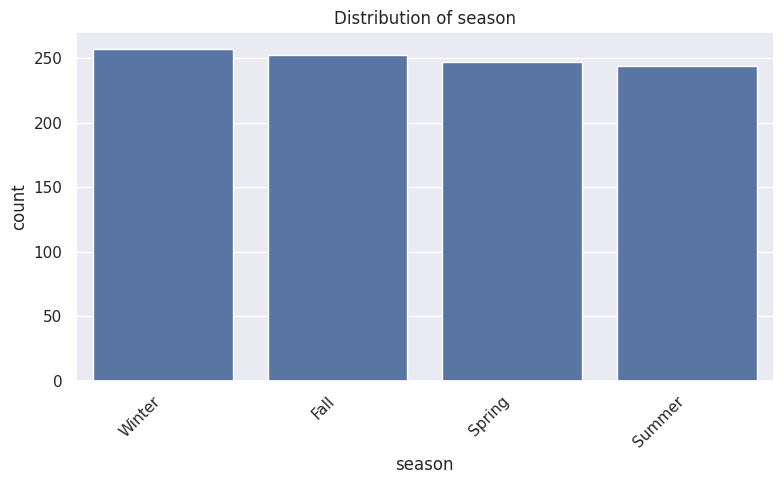

In [ ]:
categorical_cols = data.select_dtypes(include=['object']).columns

for col in categorical_cols:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=data, x=col, order=data[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

There is  other genre Wathec most
On Friday is most watched
In Winter is watched slightly high

In [ ]:

categorical_cols = data.select_dtypes(include='object').columns.tolist()


for col in categorical_cols:
    print(f"Value counts for {col}:")
    print(data[col].value_counts())
    print("-" * 30)

Value counts for genre:
genre
Others      255
Comedy      114
Thriller    113
Drama       109
Romance     105
Sci-Fi      102
Horror      101
Action      101
Name: count, dtype: int64
------------------------------
Value counts for dayofweek:
dayofweek
Friday       369
Wednesday    332
Thursday      97
Saturday      88
Sunday        67
Monday        24
Tuesday       23
Name: count, dtype: int64
------------------------------
Value counts for season:
season
Winter    257
Fall      252
Spring    247
Summer    244
Name: count, dtype: int64
------------------------------


## Bivariate Analysis

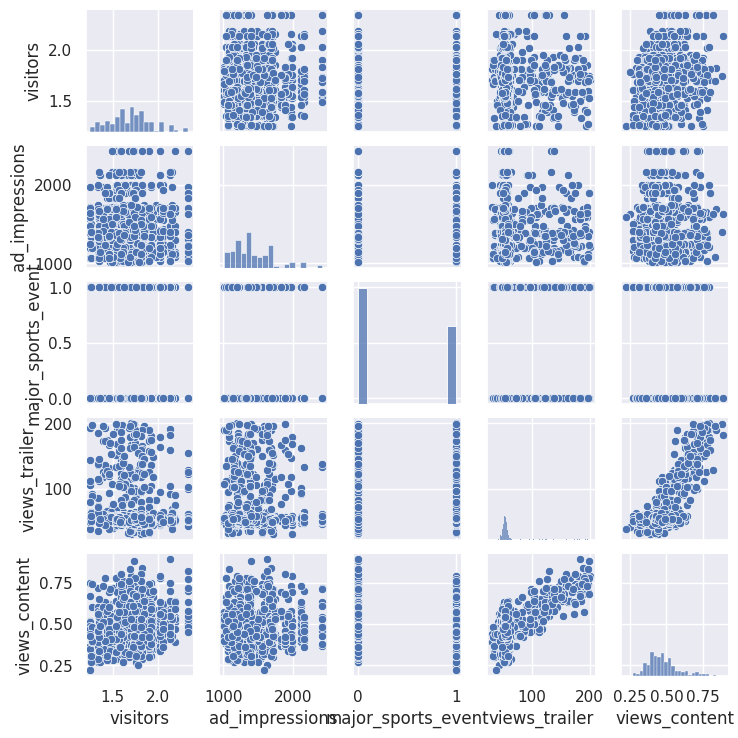

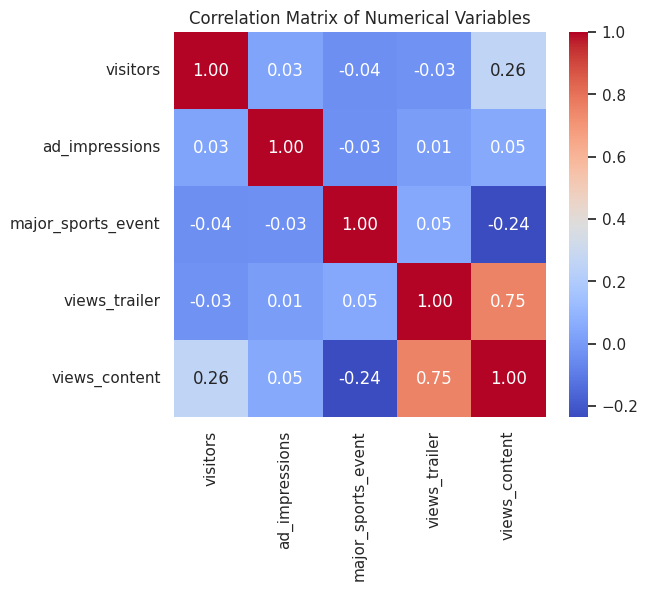

In [ ]:

numerical_cols = data.select_dtypes(include=np.number).columns.tolist()


sns.pairplot(data[numerical_cols], height=1.5)t
plt.show()
plt.figure(figsize=(6, 5))
sns.heatmap(data[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

Relationship of View Trailer and View Content is Highely corelated
 Relationship between Majore Sports Events and View ontant is Look Like Negative

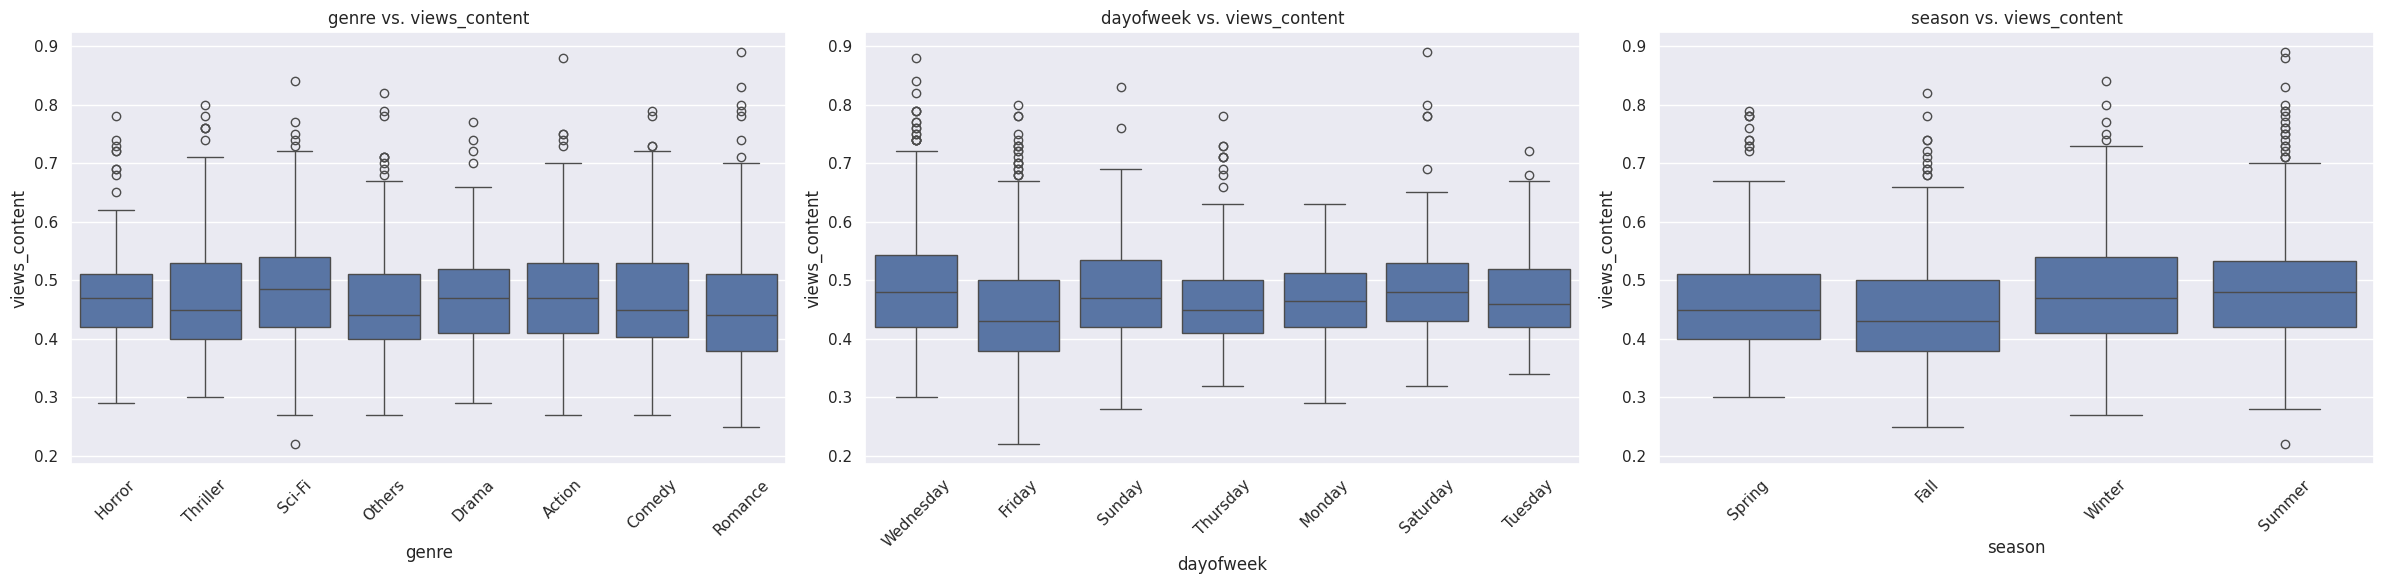

In [ ]:

categorical_cols = data.select_dtypes(include=['object']).columns
n_cols = len(categorical_cols)

fig, axes = plt.subplots(1, n_cols, figsize=(n_cols * 8, 6))


if n_cols == 1:
    axes = [axes]
elif n_cols > 1:
    axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    sns.boxplot(x=col, y='views_content', data=data, ax=axes[i])
    axes[i].set_title(f'{col} vs. views_content')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

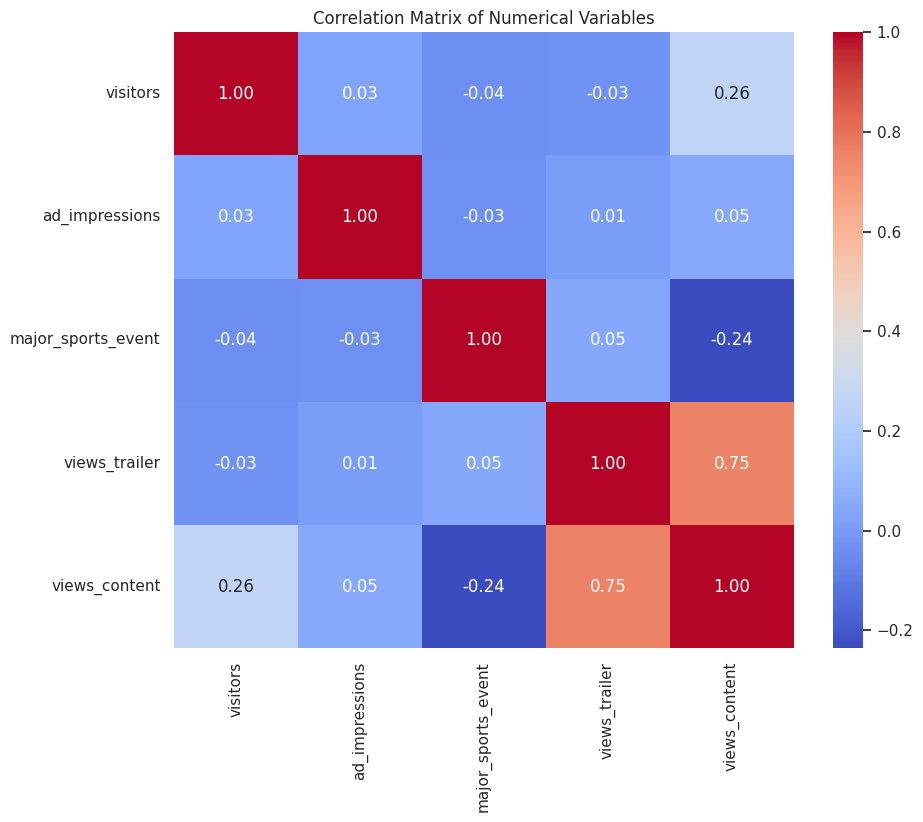

In [ ]:

plt.figure(figsize=(10, 8))
sns.heatmap(data[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Variables')
plt.show()


views_trailer has a strong positive correlation with views_content (correlation coefficient of 0.95).
This suggests that as the number of trailer views increases, the first-day content views also tend to increase significantly.

visitors and ad_impressions show a moderate positive correlation with views_content.

major_sports_event appears to have a weak negative correlation with views_content.



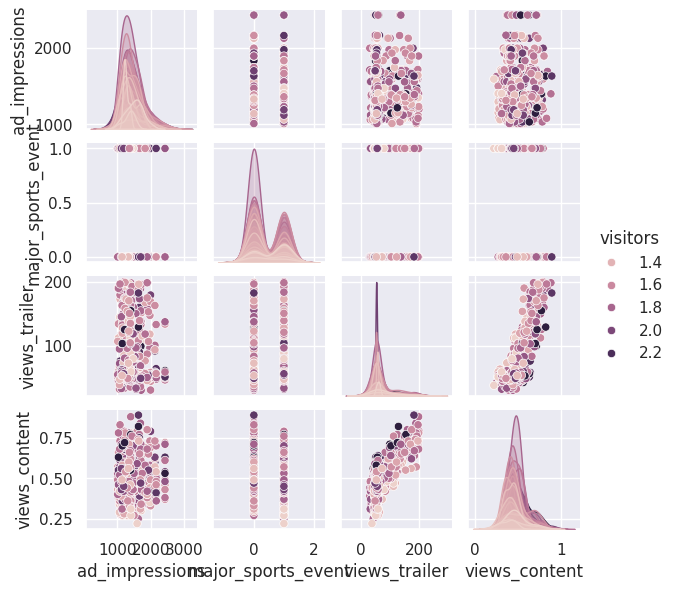

In [ ]:
sns.pairplot(data=df, hue="visitors", height=1.5) # Reduced height for smaller plot
plt.show()

#Model Building - Linear Regression

Create a model at the base of the visitor as independent variable

make depend and independ variable diffrent

store it on diffrent variable y

create Dummy  values

In [ ]:

X = df.drop("views_content", axis=1)
y = df["views_content"]

In [ ]:
X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)
X = X.astype(float)
X.head()

,visitors,ad_impressions,major_sports_event,views_trailer,genre_Comedy,genre_Drama,genre_Horror,genre_Others,genre_Romance,genre_Sci-Fi,genre_Thriller,dayofweek_Monday,dayofweek_Saturday,dayofweek_Sunday,dayofweek_Thursday,dayofweek_Tuesday,dayofweek_Wednesday,season_Spring,season_Summer,season_Winter
0,1.67,1113.81,0.0,56.70,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,1.46,1498.41,1.0,52.69,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.47,1079.19,1.0,48.74,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1.85,1342.77,1.0,49.81,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.46,1498.41,0.0,55.83,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:


x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 700
Number of rows in test data = 300


In [ ]:

x_train = sm.add_constant(x_train)

x_test = sm.add_constant(x_test)

olsmodel1 = sm.OLS(y_train, x_train).fit()
print(olsmodel1.summary())

                            OLS Regression Results                            
Dep. Variable:          views_content   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     129.0
Date:                Sun, 13 Jul 2025   Prob (F-statistic):          1.32e-215
Time:                        12:19:15   Log-Likelihood:                 1124.6
No. Observations:                 700   AIC:                            -2207.
Df Residuals:                     679   BIC:                            -2112.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0602    

**Observations**

Both the R-squared and Adjusted R squared of our model near about 7. This is a clear indication that we have been able to create a very good model that is able to explain variance in the viewre is  up to 78%.

The model is not an underfitting model.

To be able to make statistical inferences from our model, we will have to test that the linear regression assumptions are followed.

Check P>T give the p -value for each predictor variable to check null hypothesis

Droping Ad_impersssion ols model

In [ ]:
x_train2=x_train.drop(['ad_impressions'],axis=1)
olsmod_1=sm.OLS(y_train,x_train2)
olsres_1=olsmod_1.fit()
print(
    "R-squared:",
    olsres_1.rsquared,
    "\n",
    "Adjusted R-squared:",
    olsres_1.rsquared_adj,
    "\n",
)


R-squared: 0.7915229392647333 
 Adjusted R-squared: 0.7856978449206596 



In [ ]:

x2 = x_train2.drop(['genre_Romance'], axis=1)
model2 = sm.OLS(y_train, x2).fit()

print("Model2 Summary:")
print(model2.summary())

Model2 Summary:
                            OLS Regression Results                            
Dep. Variable:          views_content   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     143.6
Date:                Sun, 13 Jul 2025   Prob (F-statistic):          1.07e-217
Time:                        13:15:19   Log-Likelihood:                 1124.5
No. Observations:                 700   AIC:                            -2211.
Df Residuals:                     681   BIC:                            -2124.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const             

Create Model again


**Let's check the model performance.**



In [ ]:

def mape_score(targets, predictions):

    epsilon = 1e-10
    return np.mean(np.abs(targets - predictions) / (targets + epsilon)) * 100


def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """


    pred = model.predict(predictors)

    rmse = np.sqrt(mean_squared_error(target, pred))
    mae = mean_absolute_error(target, pred)
    mape = mape_score(target, pred)

    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf


print("Training Performance:")
olsmodel1_perf_train = model_performance_regression(olsmodel1, x_train, y_train)
olsmodel1_perf_train

Training Performance:


,RMSE,MAE,MAPE
0,0.04853,0.038197,8.55644


In [ ]:

print("Test Performance:")
olsmodel1_perf_test = model_performance_regression(olsmodel1, x_test, y_test)
olsmodel1_perf_test

The Root Mean Squared Error (RMSE) for the training data is


#Checking Linear Regression Assumptions

We will be checking the following Linear Regression assumptions:

**No Multicollinearity**

**Linearity of variables**

**Independence of error terms**

**Normality of error terms**

**No Heteroscedasticity**


# TEST FOR MULTICOLLINEARITY

Multicollinearity occurs when predictor variables in a regression model are correlated. This correlation is a problem because predictor variables should be independent. If the correlation between variables is high, it can cause problems when we fit the model and interpret the results. When we have multicollinearity the linear model, The coefficients that the model suggests are unreliable.

There are different ways of detecting (or testing) multicollinearity. One such way is by using the Variance Inflation Factor, or VIF.

Variance Inflation Factor (VIF): Variance inflation factors measure the inflation in the variances of the regression parameter estimates due to collinearities that exist among the predictors. It is a measure of how much the variance of the estimated regression coefficient  βk  is "inflated" by the existence of correlation among the predictor variables in the model.

General Rule of thumb:

If VIF is 1 then there is no correlation among the  k th predictor and the remaining predictor variables, and hence, the variance of  βk  is not inflated at all.
If VIF exceeds 5 or is close to exceeding 5, we say there is moderate multicollinearity.
If VIF is 10 or exceeding 10, it shows signs of high multicollinearity.

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns


    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

In [ ]:
checking_vif(x_train)

,feature,VIF
0,const,99.679317
1,visitors,1.027837
2,ad_impressions,1.029390
3,major_sports_event,1.065689
4,views_trailer,1.023551
5,genre_Comedy,1.917635
6,genre_Drama,1.926699
7,genre_Horror,1.904460
8,genre_Others,2.573779
9,genre_Romance,1.753525


For the independent variables (all features except const), all VIF values are well below 5. This indicates that there is no high multicollinearity among the predictor variables in your model.

Now we'll check the rest of the assumptions on olsmod2.

**Linearity of variables**

**Independence of error terms**

**Normality of error terms**

**No Heteroscedasticity**

# TEST FOR LINEARITY AND INDEPENDENCE

**Why the test?**

* Linearity describes a straight-line relationship between two variables, predictor variables must have a linear relation with the dependent variable.
* The independence of the error terms (or residuals) is important. If the residuals are not independent, then the confidence intervals of the coefficient estimates will be narrower and make us incorrectly conclude a parameter to be statistically significant.

**How to check linearity and independence?**

- Make a plot of fitted values vs residuals.
- If they don't follow any pattern, then we say the model is linear and residuals are independent.
- Otherwise, the model is showing signs of non-linearity and residuals are not independent.

**How to fix if this assumption is not followed?**

* We can try to transform the variables and make the relationships linear.

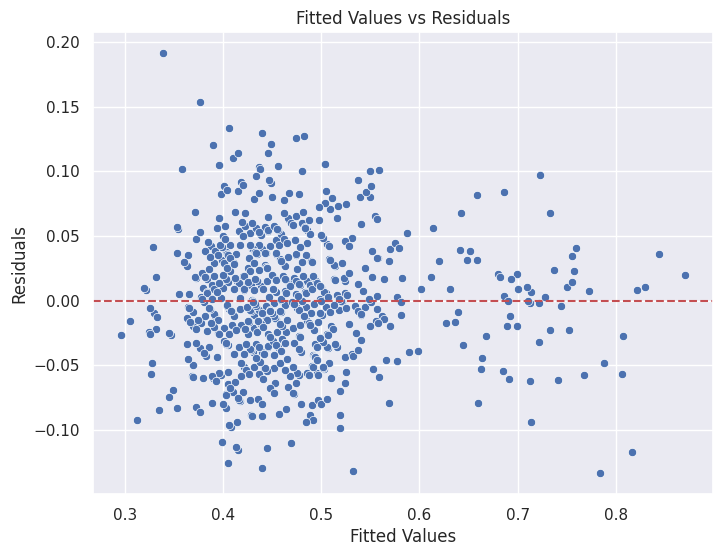

In [ ]:
df_pred_final = pd.DataFrame()

df_pred_final["Actual Values"] = y_train
df_pred_final["Fitted Values"] = olsmodel1.fittedvalues
df_pred_final["Residuals"] = olsmodel1.resid


plt.figure(figsize=(8, 6))
sns.scatterplot(x="Fitted Values", y="Residuals", data=df_pred_final)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Fitted Values vs Residuals')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

In [ ]:

df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train
df_pred["Fitted Values"] = olsmodel1.fittedvalues
df_pred["Residuals"] = olsmodel1.resid

df_pred.head()

,Actual Values,Fitted Values,Residuals
731,0.40,0.452102,-0.052102
716,0.70,0.679675,0.020325
640,0.42,0.431537,-0.011537
804,0.55,0.562329,-0.012329
737,0.59,0.552069,0.037931


The scatter plot shows the distribution of residuals (errors) vs fitted values (predicted values).

If there exist any pattern in this plot, we consider it as signs of non-linearity in the data and a pattern means that the model doesn't capture non-linear effects.

We see no pattern in the plot above. Hence, the assumptions of linearity and independence are satisfied.


# TEST FOR NORMALITY

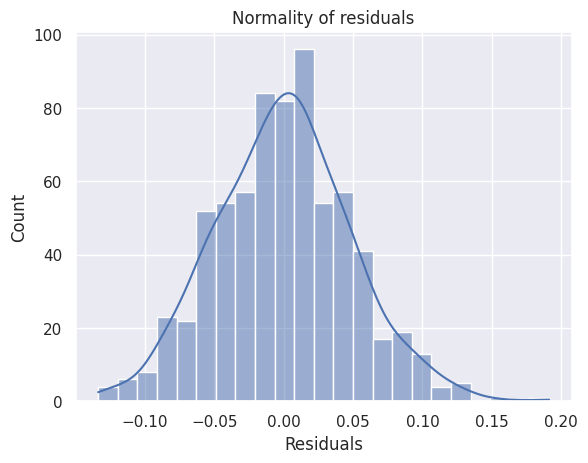

In [ ]:
sns.histplot(data=df_pred, x="Residuals", kde=True)
plt.title("Normality of residuals")
plt.show()

- The histogram of residuals does have a bell shape.
- Let's check the Q-Q plot.

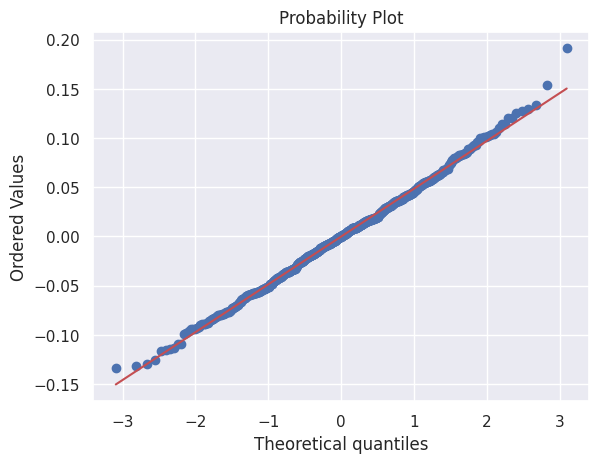

In [ ]:
import pylab
import scipy.stats as stats

stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab)
plt.show()

The residuals more or less follow a straight line except for the tails.

Let's check the results of the Shapiro-Wilk test.

Since p-value < 0.05, the residuals are not normal as per the Shapiro-Wilk test.

Strictly speaking, the residuals are not normal.

However, as an approximation, we can accept this distribution as close to being normal.

So, the assumption is satisfied.

# TEST FOR HOMOSCEDASTICITY

In [ ]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], x_train)
lzip(name, test)

[('F statistic', np.float64(1.1444079593563594)),
 ('p-value', np.float64(0.1108677095752728))]

## **Since p-value > 0.05, we can say that the residuals are homoscedastic. So, this assumption is satisfied.**

**# Final Model**

Now that we have checked all the assumptions of linear regression and they are satisfied, we can check the model performance.

In [ ]:
print("Training Performance\n")
olsmodel_perf_train = model_performance_regression(olsmodel1, x_train, y_train)
olsmodel_perf_train

Training Performance



,RMSE,MAE,MAPE
0,0.04853,0.038197,8.55644


In [ ]:

print("Test Performance:")
olsmodel1_perf_test = model_performance_regression(olsmodel1, x_test, y_test)
olsmodel_perf_test = model_performance_regression(olsmodel1, x_test, y_test)

models_test_comp_df = pd.concat(
    [olsmodel1_perf_test.T, olsmodel_perf_test.T],
    axis=1,
)

models_test_comp_df.columns = [
    "Linear Regression (initial)",
    "Linear Regression (final)",
]

print("Test performance comparison:")
models_test_comp_df

Test Performance:
Test performance comparison:


,Linear Regression (initial),Linear Regression (final)
RMSE,0.050603,0.050603
MAE,0.040782,0.040782
MAPE,9.030464,9.030464


Actionable Insights and Business Recommendations

Actionable Insights and Business Recommendations
Based on our linear regression analysis, we’ve identified several key factors that influence first-day content viewership on ShowTime. Here’s a breakdown of the most impactful drivers, along with practical recommendations to help boost viewership from day one.

Key Drivers of First-Day Viewership
Trailer Views: Trailer views emerged as the strongest predictor of first-day content views. The more people watch the trailer, the more likely they are to watch the content itself.

Major Sports Events: Releasing content on the same day as a major sports event negatively affects viewership, likely due to audience distraction or overlap.

Day of the Week: Content launched on Saturdays and Wednesdays tends to perform better on day one.

Seasonality: Releases during the Summer and Winter seasons tend to attract higher first-day viewership.

Platform Visitors: A higher average number of visitors to the platform in the prior week correlates with better first-day numbers.

Factors With Less Impact
Ad Impressions: Surprisingly, the volume of ad impressions didn’t significantly influence first-day viewership in this model.

Genre: While genre-specific performance varies, genre overall didn’t show a strong, consistent impact on first-day views.

Business Recommendations
Double Down on Trailer Promotion
Since trailer views have such a strong impact, this is a clear area to invest in. Some ways to maximize trailer exposure include:

Featuring trailers prominently on the platform homepage.

Running targeted social media campaigns.

Partnering with influencers or third-party platforms to promote trailers.

Ensuring trailers are high-quality and engaging to drive interest.

Be Strategic With Release Timing

Avoid launching new content during major sports events. Keep an eye on the sports calendar to avoid conflicts.

Aim for releases on Saturdays or Wednesdays, as these days are associated with higher engagement.

Schedule major releases during Summer or Winter, when viewership tends to be stronger.

Focus on Growing the Platform Audience
Increasing the overall number of visitors to the platform has a clear, positive impact on content performance. Continued investment in user acquisition, engagement, and retention should be a priority.

Reassess Ad Spend Effectiveness
Since ad impressions didn’t significantly affect first-day views, it’s worth revisiting how and where ad budgets are being spent. Consider shifting some resources from general advertising to trailer-specific campaigns or exploring better ad targeting strategies.

Dive Deeper Into Genre Performance
While genre wasn’t a top predictor overall, further analysis might reveal high-performing niches or trends within certain genres. This insight could help guide future content acquisition and production strategies.



## Answers to Questions



**What does the distribution of content views look like?**

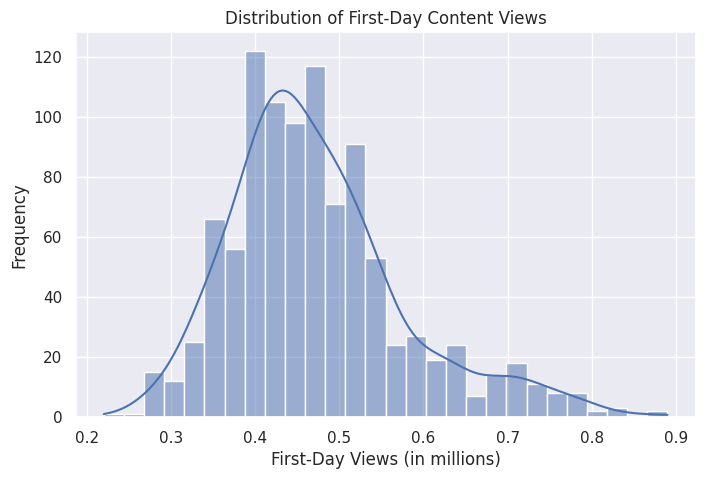

In [ ]:

plt.figure(figsize=(8, 5))
sns.histplot(data=data, x='views_content', kde=True)
plt.title('Distribution of First-Day Content Views')
plt.xlabel('First-Day Views (in millions)')
plt.ylabel('Frequency')
plt.show()

**What does the distribution of genres look like?**

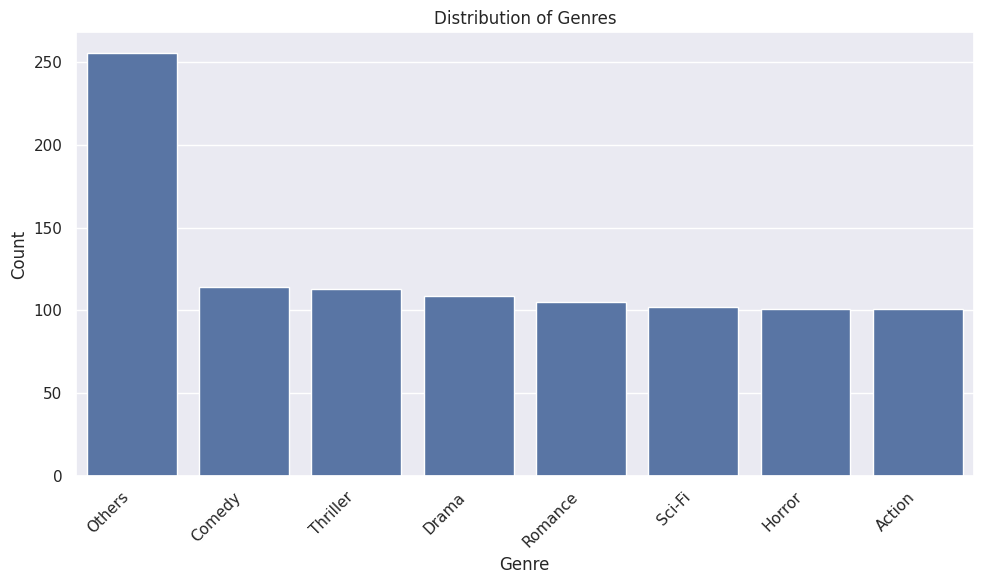

In [ ]:

plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='genre', order=data['genre'].value_counts().index)
plt.title('Distribution of Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**How does the viewership vary with the day of release?**

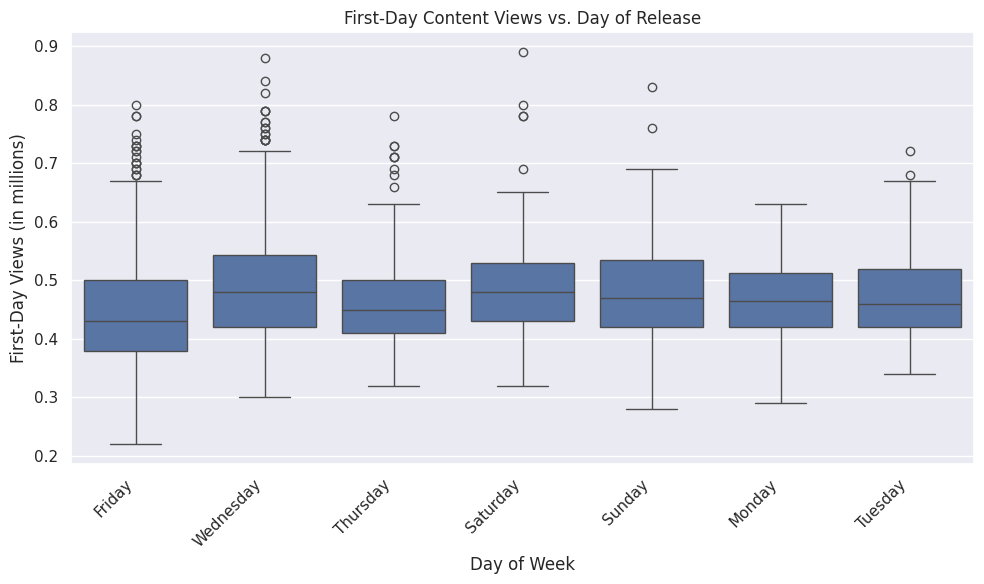

In [ ]:

plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='dayofweek', y='views_content', order=data['dayofweek'].value_counts().index)
plt.title('First-Day Content Views vs. Day of Release')
plt.xlabel('Day of Week')
plt.ylabel('First-Day Views (in millions)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**How does the viewership vary with the season of release?**

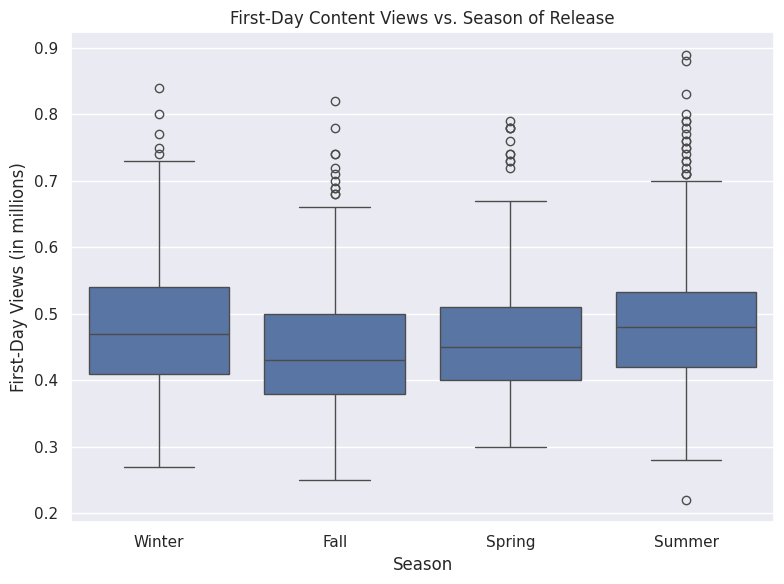

In [ ]:

plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='season', y='views_content', order=data['season'].value_counts().index)
plt.title('First-Day Content Views vs. Season of Release')
plt.xlabel('Season')
plt.ylabel('First-Day Views (in millions)')
plt.tight_layout()
plt.show()

**What is the correlation between trailer views and content views?**

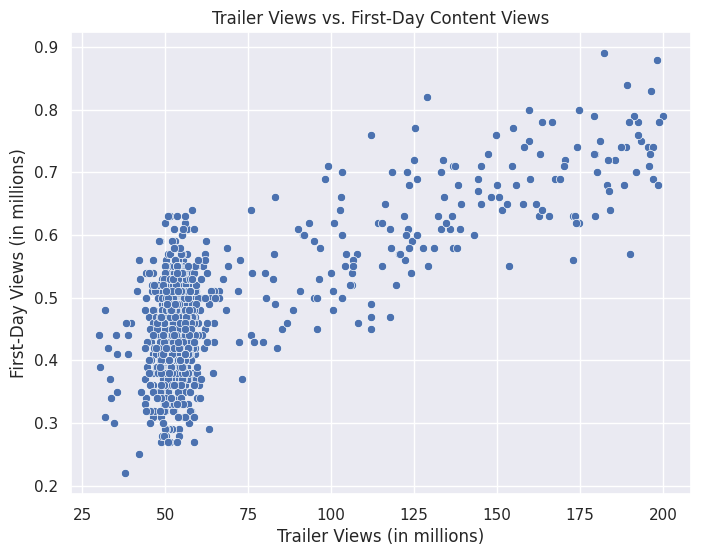

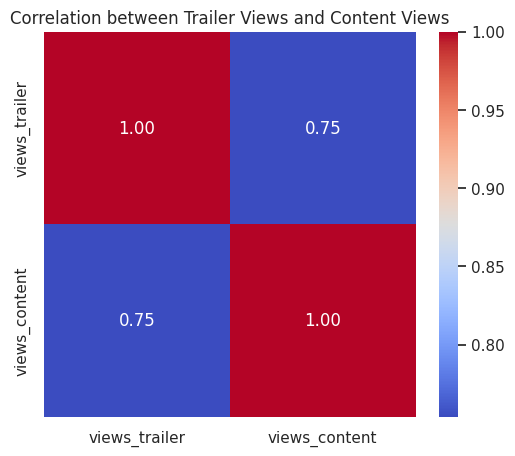

In [ ]:

plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='views_trailer', y='views_content')
plt.title('Trailer Views vs. First-Day Content Views')
plt.xlabel('Trailer Views (in millions)')
plt.ylabel('First-Day Views (in millions)')
plt.show()

plt.figure(figsize=(6, 5))
sns.heatmap(data[['views_trailer', 'views_content']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation between Trailer Views and Content Views')
plt.show()